In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv file
df = pd.read_csv('../dataset/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.to_numeric(df.TotalCharges, errors="coerce").isnull()
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [4]:
# remove rows with no TotalCharges
df = df[df.TotalCharges != " "]

In [5]:
df.TotalCharges = df.TotalCharges.astype(float)

In [6]:
def preprocess(df):
    """
    This function is to cover all the preprocessing steps on the churn dataframe. It involves selecting important features,
    encoding categorical data, handling missing values,feature scaling and splitting the data
    """
    # remove rows with no TotalCharges
    df = df[df.TotalCharges != " "]
    df.TotalCharges = df.TotalCharges.astype(float)
    # replace values
    df.replace("No internet service", "No", inplace=True)
    df.replace("No phone service", "No", inplace=True)


    return df


In [7]:
df = preprocess(df)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=df)

metadata.update_column(
    column_name='customerID',
    sdtype='id',
    regex_format='[0-9]{4}_[A-Z]{5}'
)
metadata.update_column(
    column_name='SeniorCitizen',
    sdtype='categorical')

metadata.set_primary_key(column_name='customerID')

In [10]:
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "customerID": {
            "sdtype": "id",
            "regex_format": "[0-9]{4}_[A-Z]{5}"
        },
        "gender": {
            "sdtype": "categorical"
        },
        "SeniorCitizen": {
            "sdtype": "categorical"
        },
        "Partner": {
            "sdtype": "categorical"
        },
        "Dependents": {
            "sdtype": "categorical"
        },
        "tenure": {
            "sdtype": "numerical"
        },
        "PhoneService": {
            "sdtype": "categorical"
        },
        "MultipleLines": {
            "sdtype": "categorical"
        },
        "InternetService": {
            "sdtype": "categorical"
        },
        "OnlineSecurity": {
            "sdtype": "categorical"
        },
        "OnlineBackup": {
            "sdtype": "categorical"
        },
        "DeviceProtection": {
            "sdtype": "categorical"
        },
        "TechSupport": {
    

In [9]:
df_1 = df.iloc[:3000,:]
df_2 = df.iloc[3000:,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

Shape of new dataframes - (3000, 21) , (4032, 21)


In [10]:
df_2.to_csv("test.csv")
df_1.to_csv("train.csv")

In [13]:
from sdv.single_table import CopulaGANSynthesizer

synthesizer = CopulaGANSynthesizer(metadata)
synthesizer.fit(df_1)

In [14]:
synthetic_data = synthesizer.sample(num_rows=100000)

In [15]:
synthetic_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0000_AAAAA,Female,1,No,No,47,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,35.13,153.82,No
1,0000_AAAAB,Male,0,No,No,17,Yes,No,Fiber optic,No,...,No,No,No,No,Two year,Yes,Mailed check,40.04,2238.03,No
2,0000_AAAAC,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,68.95,66.59,Yes
3,0000_AAAAD,Female,1,No,No,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),35.51,5067.27,No
4,0000_AAAAE,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,18.83,1459.58,Yes


In [16]:
def encode(df):
        # # Encode categorical features
    binary_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

    for col in binary_columns:
        df[col].replace({"Yes": 1, "No": 0}, inplace=True)

    df["gender"].replace({"Female": 1, "Male": 0}, inplace=True)
    return df

In [17]:
df = encode(synthetic_data)

In [18]:
synthetic_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0000_AAAAA,1,1,0,0,47,1,0,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Mailed check,35.13,153.82,0
1,0000_AAAAB,0,0,0,0,17,1,0,Fiber optic,0,...,0,0,0,0,Two year,1,Mailed check,40.04,2238.03,0
2,0000_AAAAC,0,0,0,0,1,1,0,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Mailed check,68.95,66.59,1
3,0000_AAAAD,1,1,0,0,72,1,1,Fiber optic,0,...,0,0,1,1,One year,1,Credit card (automatic),35.51,5067.27,0
4,0000_AAAAE,1,0,0,1,1,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,18.83,1459.58,1


In [19]:
# The customerID column is not useful as the feature is used for identification of customers.
df.drop(["customerID"],axis=1,inplace = True)

In [20]:
# Get dummy data for some of the categorical data
synthetic_data = pd.get_dummies(data = synthetic_data, columns=['InternetService', 'Contract', 'PaymentMethod'])
synthetic_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,0,47,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,17,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,1,0,0,72,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,1,0,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [22]:
# create a copy of the dataframe
df_copy = synthetic_data.copy()
X = df_copy.drop("Churn", axis=1)
y = df_copy["Churn"]

In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

X_train.shape, X_test.shape

((80000, 26), (20000, 26))

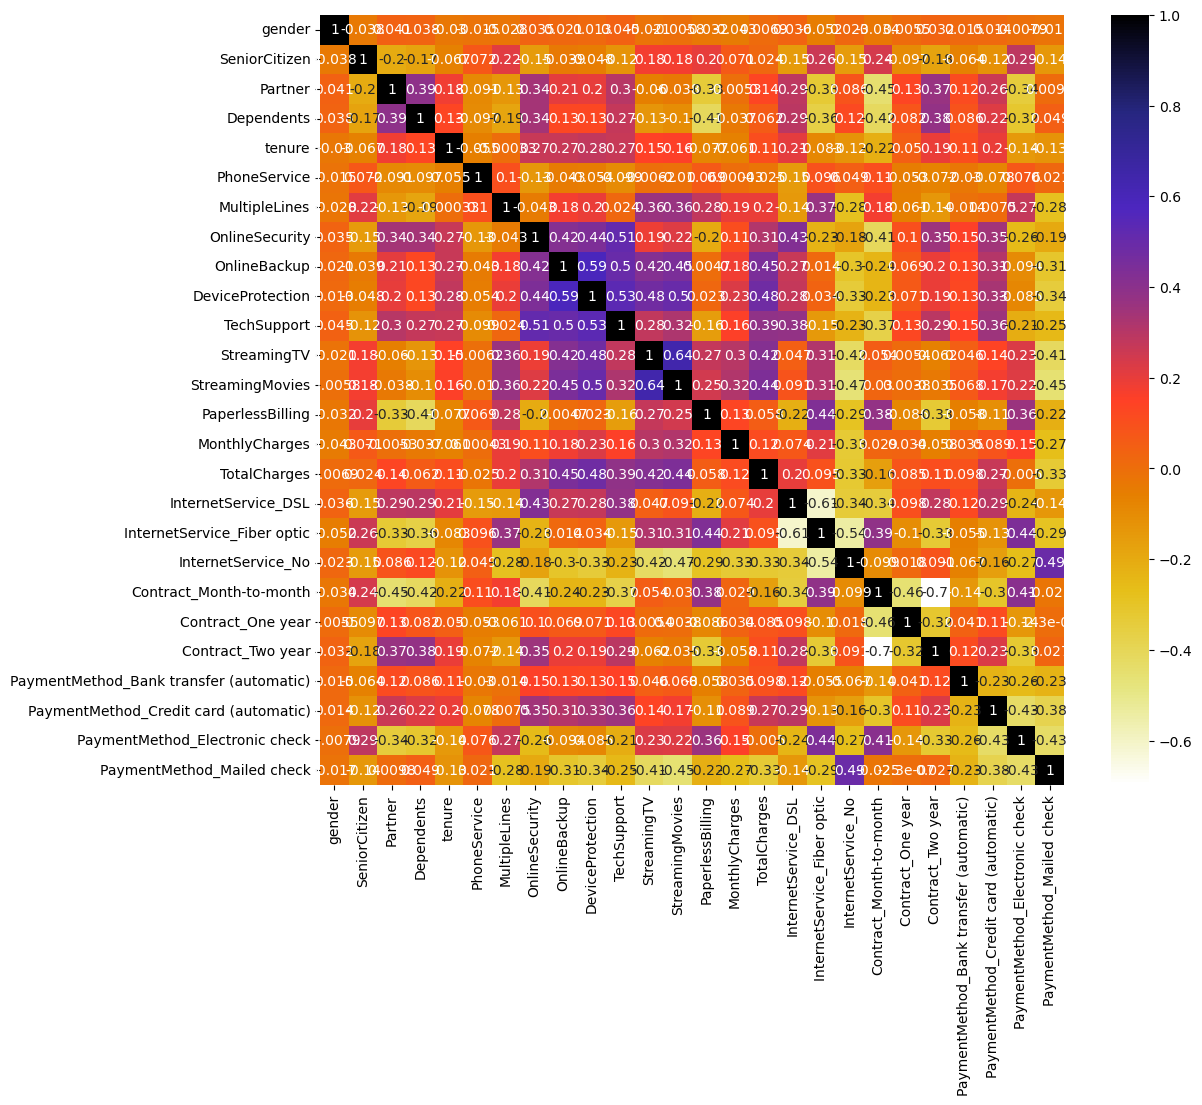

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [25]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

0

In [28]:
# the below are the columns that are highly correlated and can be removed
corr_features

set()

In [29]:
X.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.038392,0.040791,0.038403,-0.029944,-0.014586,-0.027641,0.034824,0.021070,0.013101,...,0.036409,-0.051815,0.022918,-0.034294,5.489561e-03,0.032149,0.015073,0.014380,-0.007924,-1.713516e-02
SeniorCitizen,-0.038392,1.000000,-0.201127,-0.174052,-0.067098,0.071799,0.215192,-0.150622,-0.038638,-0.047907,...,-0.151432,0.263798,-0.152627,0.240093,-9.693541e-02,-0.177927,-0.064198,-0.117701,0.286756,-1.350264e-01
Partner,0.040791,-0.201127,1.000000,0.393489,0.178721,-0.091438,-0.134574,0.343363,0.207933,0.199139,...,0.290199,-0.331497,0.085940,-0.447867,1.340772e-01,0.369575,0.117156,0.262981,-0.343354,9.833421e-03
Dependents,0.038403,-0.174052,0.393489,1.000000,0.131788,-0.096885,-0.185696,0.338689,0.130672,0.127156,...,0.291678,-0.362500,0.121169,-0.415752,8.189157e-02,0.377383,0.086315,0.218302,-0.316898,4.948727e-02
tenure,-0.029944,-0.067098,0.178721,0.131788,1.000000,-0.055214,-0.000330,0.268425,0.265633,0.278826,...,0.210171,-0.082865,-0.124343,-0.219915,4.950969e-02,0.194629,0.110188,0.195654,-0.143468,-1.266198e-01
PhoneService,-0.014586,0.071799,-0.091438,-0.096885,-0.055214,1.000000,0.100809,-0.134821,-0.043130,-0.053934,...,-0.153219,0.095762,0.048693,0.108003,-5.318349e-02,-0.072320,-0.030420,-0.077926,0.075991,2.088832e-02
MultipleLines,-0.027641,0.215192,-0.134574,-0.185696,-0.000330,0.100809,1.000000,-0.043360,0.176857,0.195096,...,-0.142495,0.367252,-0.284875,0.177281,-6.075545e-02,-0.140098,-0.013664,0.007451,0.272078,-2.821064e-01
OnlineSecurity,0.034824,-0.150622,0.343363,0.338689,0.268425,-0.134821,-0.043360,1.000000,0.421159,0.441591,...,0.426096,-0.230190,-0.178281,-0.409415,1.043096e-01,0.352557,0.154121,0.349438,-0.256423,-1.948082e-01
OnlineBackup,0.021070,-0.038638,0.207933,0.130672,0.265633,-0.043130,0.176857,0.421159,1.000000,0.586828,...,0.269683,0.014130,-0.302513,-0.236293,6.877685e-02,0.196567,0.134563,0.309840,-0.094419,-3.102706e-01
DeviceProtection,0.013101,-0.047907,0.199139,0.127156,0.278826,-0.053934,0.195096,0.441591,0.586828,1.000000,...,0.276863,0.034491,-0.334286,-0.233441,7.146664e-02,0.191358,0.131293,0.332725,-0.085371,-3.403097e-01


In [30]:
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
synthetic_data[cols_to_scale] = scaler.fit_transform(synthetic_data[cols_to_scale])

In [31]:
for column in synthetic_data:
    print(f'{column}: {synthetic_data[column].unique()}')

gender: [1 0]
SeniorCitizen: [1 0]
Partner: [0 1]
Dependents: [0 1]
tenure: [0.64788732 0.22535211 0.         1.         0.01408451 0.47887324
 0.97183099 0.54929577 0.21126761 0.46478873 0.57746479 0.63380282
 0.25352113 0.88732394 0.94366197 0.26760563 0.18309859 0.02816901
 0.23943662 0.04225352 0.87323944 0.98591549 0.6056338  0.92957746
 0.8028169  0.08450704 0.52112676 0.11267606 0.35211268 0.95774648
 0.83098592 0.77464789 0.66197183 0.12676056 0.74647887 0.84507042
 0.69014085 0.85915493 0.61971831 0.16901408 0.42253521 0.14084507
 0.78873239 0.05633803 0.07042254 0.56338028 0.67605634 0.15492958
 0.3943662  0.45070423 0.36619718 0.4084507  0.81690141 0.49295775
 0.5915493  0.90140845 0.70422535 0.71830986 0.76056338 0.73239437
 0.30985915 0.1971831  0.32394366 0.91549296 0.09859155 0.33802817
 0.43661972 0.28169014 0.29577465 0.38028169 0.53521127 0.50704225]
PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [0 1]
DeviceProtection: [0 1]
TechSupport:

In [32]:
synthetic_data.to_csv("synthatic_data.csv")